## Tabel of Contents:
* [1 Case 1. Heart Disease Classification](#case-1)
* [2 Background](#case-background)
* [3 Data](#loading-data)
* [4 Exploratory Data Analysis](#exploratory-analysis)
* [5 Models and Training](#models-trainning)
* [6 Result and Discussion](#result-discussion)
* [7 Conclusions](#cas-conclusion)

# Case 1. Heart Disease Classification <a class="anchor" id="case-1"></a>
Team 14:<br>
* Awet Ghebreslassie
* Leevi Pelkonen
* Visa Soininen<br><br>
Last edited: 02.02.2020<br>
Neural Networks for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

# 2 Background  <a class="anchor" id="case-background"></a>

The aim of this Notebook is to predict the probability of heart disease occurrence using data mining techniques and machine learning algorithms.
In this case we have used data sets that was collected by Cleveland Clinic Foundation in Switzerland.

# 3 Data  <a class="anchor" id="loading-data"></a>

The data is from UCI and can be found [here](http://archive.ics.uci.edu/ml/datasets/Heart+Disease). The database contains 303 instances and 76 attributes, but in this case study only 14 attributes are used.<br>
Attribute Information:

| Attribute | Details |
| :----------|:-------|
|age | age in years |
|sex | sex(1 = male; 0 = female) |
|cp | chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic) |
|trestbps | resting blood pressure (in mm Hg on admission to the hospital) |
|chol | serum cholestoral in mg/dl |
|fbs | fasting blood sugar > 120 mg/dl (1 = true; 0 = false) |
|restecg | resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy |
|thalach | maximum heart rate  |
|exang | exercise induced angina (1 = yes; 0 = no) |
|oldpeak | ST depression induced by exercise relative to rest |
|slope | the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping) |
|ca | number of major vessels (0-3) colored by  |
|thal | 3 = normal; 6 = fixed defect; 7 = reversable  |
|num | the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing |

In [1]:
# imports
%pylab inline
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
file_url = 'Data/processed.cleveland.data'
# file_url = r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv(file_url, index_col=None, na_values = '?', names=col_names)
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


# 4 Exploratory Data Analysis <a class="anchor" id="exploratory-analysis"></a>

#### 4.1 Descriptive statistics and summary

In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


#### 4.2 Investigating missing attribute values

In [4]:
print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


We can see that there are 6 missing values occuring only on two attributes namely number of major vessels and thal. The missing values are also found on 6 distince instances or rows.

#### 4.3 Correlation matrix and heatmap

AxesSubplot(0.125,0.125;0.62x0.755)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.504092


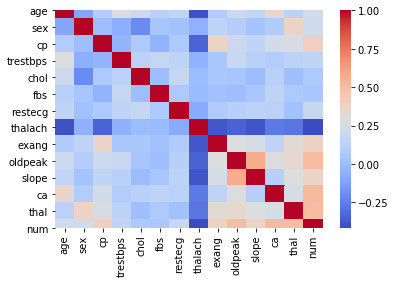

In [5]:
corr = data.corr()
print(sns.heatmap(corr, cmap='coolwarm'))
corr.style.background_gradient(cmap='coolwarm', axis=None)

#### 4.4 Visulazing the distibution of the data for all attributes

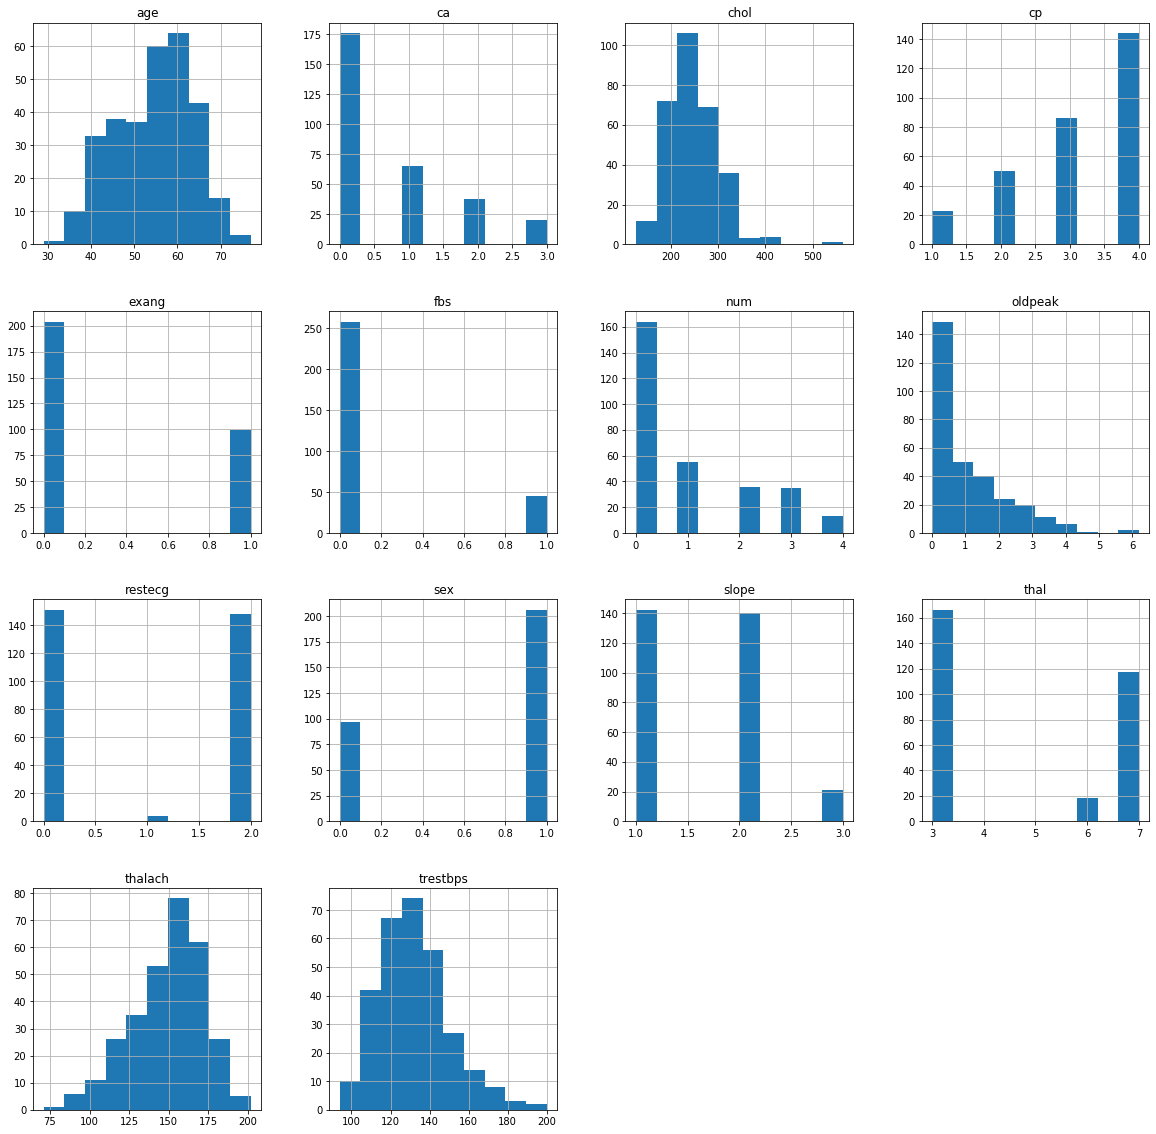

In [6]:
data.hist(figsize=(20, 20));

We can see that all attributes have different types of distibution, and we need to scale our data if our models depends on uniform distribution across attributes.

#### 4.5 Visualizing count of heart disease serverity

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64 



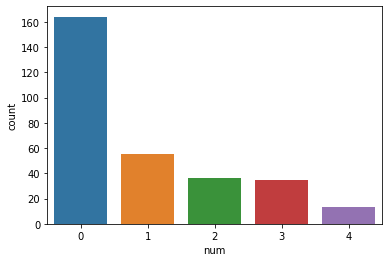

Number of people with heart disease:  139
Number of people without heart disease:  164


In [7]:
# heart disease counts
print(data['num'].value_counts(), '\n')

# plot count of heart disease severity
sns.countplot(x="num", data=data)
plt.show()

# count all instance with heart serverity more than 0
print('Number of people with heart disease: ' ,data[data['num'] > 0]['num'].count())

# count all instance with heart serverity less than 0
print('Number of people without heart disease: ' ,data[data['num'] < 1]['num'].count())

From the numbers above we can see that our data is fairly balanced when it comes to diagnosis. 139 people have the heart disease with different severity level and 164 don't show heart disease.

# 5 Models and training  <a class="anchor" id="models-trainning"></a>

We have used Random Forest Classifier, KNeighborsClassifier, DecisionTreeClassifier, LinearRegression, LogisticRegression and Keras Sequential model to predict the occurance of heart disease on a person using the given dataset.

In [8]:
# data preprocessing for models

# list of models with their accuracy
models = { 'name': [], 'accuracy': [] }

# since we have few instances with missing value we will remove them from the dataset
data_rfc = data.dropna()

# Convert categorical attributes into dummy/indicator variables (One hot encoding)
data_rfc = pd.get_dummies(data_rfc, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# scale non categorical attributes
standardScaler = preprocessing.StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data_rfc[columns_to_scale] = standardScaler.fit_transform(data_rfc[columns_to_scale])

# split data
samples= data_rfc.iloc[:,0:13].to_numpy()

# simplifying the target column to 1 or 0 meaning a person have disease or not
labels = 1.0 * (data_rfc.iloc[:, 13] > 0).to_numpy()

# splitting data with 30 percent for test and 70 percent for trainning, setting random state of keras to easily reproduce on re-runs
train_samples,test_samples,train_labels,test_labels = train_test_split(samples, labels, test_size=0.3, random_state=10)

# print one hot encoded and scaled data
data_rfc.head()

,age,trestbps,chol,thalach,oldpeak,num,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.936181,0.750380,-0.276443,0.017494,1.068965,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,2,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


#### 5.1 Random Forest Classifier

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        78
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

[[78  0]
 [ 0 12]]


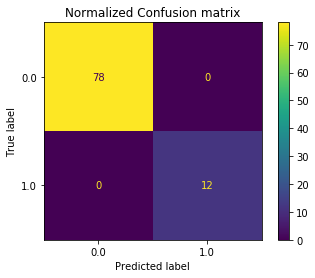

In [9]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(train_samples, train_labels)
predicted_labels = rf_classifier.predict(test_samples)
print(metrics.classification_report(test_labels, predicted_labels))

models['name'].append('RandomForestClassifier')
models['accuracy'].append(metrics.accuracy_score(test_labels, predicted_labels))

# print(metrics.confusion_matrix(test_labels, predicted_labels).T)
disp = metrics.plot_confusion_matrix(rf_classifier, test_samples, test_labels, normalize=None)
disp.ax_.set_title("Normalized Confusion matrix")
print(disp.confusion_matrix)
plt.show()

Using the Random Forest Classifier we are able to achieve 100 percent accuracy. we have dropped the NaN values since inputing them didn't change the result. The target column values are simplified to 1 or 0 meaning the person either has the disease or not. We have converted categorical attributes into dummy variables and we have scaled no categorical attributes using StandardScaler. We have used 70 percent of the data for training and 30% percent for testing in this case.

#### 5.2 KNeighborsClassifier

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        78
         1.0       1.00      0.33      0.50        12

    accuracy                           0.91        90
   macro avg       0.95      0.67      0.73        90
weighted avg       0.92      0.91      0.89        90

[[78  0]
 [ 8  4]]


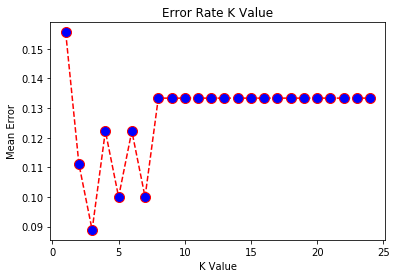

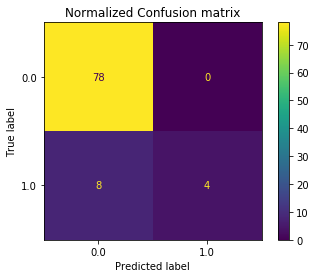

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [10]:
# Calculating error for K values between 1 and 25
mean_error = []

for i in range(1, 25):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(train_samples, train_labels)
    pred_i = knn_classifier.predict(test_samples)
    mean_error.append(np.mean(pred_i != test_labels))

# plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), mean_error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# creating KNeighborsClassifier with value of K which have the least mean error
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(train_samples, train_labels)
predicted_labels = knn_classifier.predict(test_samples)
print(metrics.classification_report(test_labels, predicted_labels))

models['name'].append('KNeighborsClassifier')
models['accuracy'].append(metrics.accuracy_score(test_labels, predicted_labels))

# print(metrics.confusion_matrix(test_labels, predicted_labels).T)
disp = metrics.plot_confusion_matrix(knn_classifier, test_samples, test_labels, normalize=None)
disp.ax_.set_title("Normalized Confusion matrix")
print(disp.confusion_matrix)
plt.show()

pred = pd.DataFrame({'Actual': list(test_labels), 'Predicted': list(predicted_labels)})
pred.head(10)

We can observe that the KNeighborsClassifier performs the worst on accuracy, from the graph of different K values, we can have the least mean error when K is equal to 3, builiding our classifier with K = 3 gives us 91 percent accuracy. The decrease on accuracy in the case of KNeighborsClassifier could be because we have many categorical attributes, even though we have one hot encoded our categorical features, it increase the dimension of out dataset which is also not good with KNeighborsClassifier. Looking at the confusion matrix, we can see that the model have more false postive than true negative as can be observed from the recall values as well, this tells us that the model have high accuracy only because test includes more true positives, that is about 80 percent of the test instances, and we need to improve this model using other methods than number of K neighbors.

#### 5.3 DecisionTreeClassifier

In [11]:
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(train_samples, train_labels)
predicted_labels = dt_classifier.predict(test_samples)
print('Accuracy score:',metrics.accuracy_score(test_labels, predicted_labels))
print(metrics.classification_report(test_labels, predicted_labels))
print(metrics.confusion_matrix(test_labels, predicted_labels).T)

models['name'].append('DecisionTreeClassifier')
models['accuracy'].append(metrics.accuracy_score(test_labels, predicted_labels))

Accuracy score: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        78
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

[[78  0]
 [ 0 12]]


#### 5.4 Keras Sequential model or linear stack of layers

In [12]:
model = Sequential()
model.add(Dense(13, activation='relu', input_shape=(13,))),
model.add(Dense(26, activation='relu')),
model.add(Dense(1, activation='sigmoid'))
model.summary()

partial_train_samples,val_samples,partial_train_labels,val_labels = train_test_split(train_samples, train_labels, test_size=0.2,random_state=42)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_train_samples, 
                    partial_train_labels, 
                    validation_data = (val_samples, val_labels), 
                    batch_size=10, epochs=60, verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 26)                364       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 27        
Total params: 573
Trainable params: 573
Non-trainable params: 0
_________________________________________________________________


In [13]:
test_loss, test_acc = model.evaluate(test_samples, test_labels, verbose=0)
print('Test accuracy:' + str(test_acc))
print('Test loss:' + str(test_loss))

models['name'].append('Sequential')
models['accuracy'].append(test_acc)

Test accuracy:1.0
Test loss:9.244302006360764e-05


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


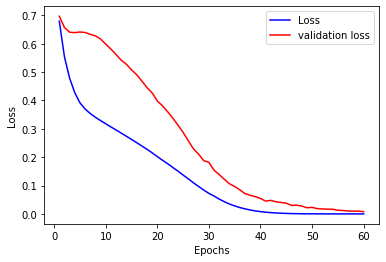

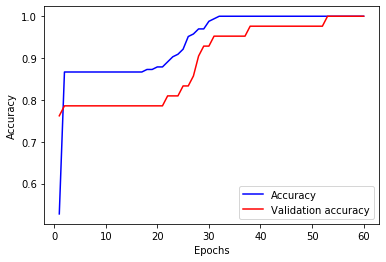

In [14]:
print(history.history.keys())
loss = history.history['loss']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'b-', label='Loss')
plt.plot(epochs, val_loss, 'r-', label='validation loss')
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(epochs, accuracy, 'b-', label='Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation accuracy')
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

We have used all data processing and data splitting from previous model (Random Forest Classifier) as they are in this model and we are able to achieve 100 percent accuracy with Keras Sequential model as well. We have used 30 percent of the data for testing, 20 percent for validation and 50 percent for training.

#### 5.5 Linear Regression
<br>
We can use Linear regression model since we have simplified our target values to 1 or 0 and the problem have become a binary classification problem, also as can be seen from exploration of data section the dataset have very few negative or positive correlations between features, from this we can understand that linear regression is suitable model for this problem. 

In [15]:
lin_reg = LinearRegression().fit(train_samples, train_labels)
predicted_labels = lin_reg.predict(test_samples) > 0.5

print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predicted_labels))
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predicted_labels))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predicted_labels)))
print('Accuracy score:',metrics.accuracy_score(test_labels, predicted_labels))
print(metrics.confusion_matrix(test_labels, predicted_labels).T)
print(metrics.classification_report(test_labels, predicted_labels))

models['name'].append('LinearRegression')
models['accuracy'].append(metrics.accuracy_score(test_labels, predicted_labels))

pred = pd.DataFrame({'Actual': list(test_labels), 'Predicted': list(predicted_labels)})
pred.head(10)

# scores = cross_val_score(estimator=lin_reg, X=test_samples, y=test_labels, cv=10)
# print(scores)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Accuracy score: 1.0
[[78  0]
 [ 0 12]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        78
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



,Actual,Predicted
0,0.0,False
1,0.0,False
2,1.0,True
3,0.0,False
4,0.0,False
5,0.0,False
6,0.0,False
7,0.0,False
8,0.0,False
9,0.0,False


#### 5.6 Logistic Regression

In [16]:
logistic_reg = LogisticRegression().fit(train_samples, train_labels)
predicted_labels = logistic_reg.predict(test_samples)

print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predicted_labels))
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predicted_labels))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predicted_labels)))
print('Accuracy score:',metrics.accuracy_score(test_labels, predicted_labels))
print(metrics.confusion_matrix(test_labels, predicted_labels).T)
print(metrics.classification_report(test_labels, predicted_labels))

models['name'].append('LogisticRegression')
models['accuracy'].append(metrics.accuracy_score(test_labels, predicted_labels))

pred = pd.DataFrame({'Actual': list(test_labels), 'Predicted': list(predicted_labels)})
pred.head(10)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Accuracy score: 1.0
[[78  0]
 [ 0 12]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        78
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


# 6 Results and Discussion  <a class="anchor" id="result-discussion"></a>

We have achieved our goal in creating model that can predict heart disease occurance with highest possible accuracy. We have used different maching learning algorithms and evaluated each one using suitable metrics, we have also used visualization to find optimal learning parameters for our models. All models created have achieved 100 percent accuracy except KNeighborsClassifier with 91 percent accuracy. The accuracy of KNeighborsClassifier may change if we don't set random state of keras, without setting random state the accurcy changes from 83 upto 98 percent randomly on each re-run of the cell, all other models accuracy is not affected by random state of keras, it was consistent on each re-run of cell. We were not able to figure out why the accuracy of KNeighborsClassifier depend on the order of instances test data.

In [17]:
# comparision of all models using accuracy metrics
df_models = pd.DataFrame(models)
df_models

,name,accuracy
0,RandomForestClassifier,1.000000
1,KNeighborsClassifier,0.911111
2,DecisionTreeClassifier,1.000000
3,Sequential,1.000000
4,LinearRegression,1.000000
5,LogisticRegression,1.000000


# 7 Conclusions  <a class="anchor" id="cas-conclusion"></a>

Having access to only 300 data samples it is reasonable to assume that the different used classification
methods can achieve a fairly accurate accuracy level in determining heart diseases. 

A classification problem with 13 different variables can be fairly quickly solved with the help of a neural network or a decision tree, since the patterns are easily recognized by a computer. Figure in 5.3 shows that the neural network has reached the maximum accuracy after 35 epochs with a batch size of 10. 